In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import numpy as np
pd.set_option('display.max_rows', 50)


In [2]:
simulated = pd.read_csv('~/Documents/PhD/Projects/10. ELECSIM/run/validation-optimisation/runs_2013/demand_none-carbon_none-datetime_2019-08-08_09-27-18-capacity_52152.csv')
simulated.head()

,Unnamed: 0,contributed_CCGT,contributed_Coal,contributed_Onshore,contributed_Offshore,contributed_PV,contributed_Nuclear,contributed_Recip_gas,contributed_Biomass,total_CCGT,total_Coal,total_Onshore,total_Offshore,total_PV,total_Nuclear,total_Recip_gas,Carbon_tax,total_genco_wealth,Electricity_cost,Carbon_emitted
0,0,269097.12,296496.48,12574.927904,12490.43052,0.0,163428.881549,1955.52,0,31272.0,17737.0,4783.0,2949.0,0.0,9238.0,672.0,23.62,1.063223e+10,64.442533,1231.241252
1,1,151462.08,289680.36,12663.542545,12497.15424,0.0,163428.881549,0.00,0,31272.0,17737.0,4783.0,2949.0,0.0,9238.0,672.0,23.62,7.873103e+09,56.539096,959.583824
2,2,267084.72,288974.10,11658.160728,12340.26744,0.0,163428.881549,1955.52,0,31272.0,17737.0,4783.0,2949.0,0.0,9238.0,672.0,23.62,1.185284e+10,61.471676,1227.092822
3,3,294325.92,291985.58,12562.865178,12522.92850,0.0,163428.881549,3259.20,0,31272.0,17737.0,4783.0,2949.0,0.0,9238.0,672.0,23.62,1.787174e+10,64.982039,1296.709178
4,4,82072.08,214620.09,12500.672367,12497.15424,0.0,146987.366417,0.00,0,31272.0,17737.0,4783.0,2949.0,0.0,9238.0,672.0,23.62,6.998416e+09,46.768186,645.509162


In [3]:
simulated = simulated.rename(columns={'total_genco_wealth':'genco_wealth'})

In [4]:
simulated_long = pd.melt(simulated, id_vars='Unnamed: 0')
simulated_long

,Unnamed: 0,variable,value
0,0,contributed_CCGT,269097.120000
1,1,contributed_CCGT,151462.080000
2,2,contributed_CCGT,267084.720000
3,3,contributed_CCGT,294325.920000
4,4,contributed_CCGT,82072.080000
5,5,contributed_CCGT,284020.560000
6,6,contributed_CCGT,82589.760000
7,7,contributed_CCGT,113242.320000
8,8,contributed_CCGT,231211.440000
9,9,contributed_CCGT,120637.440000


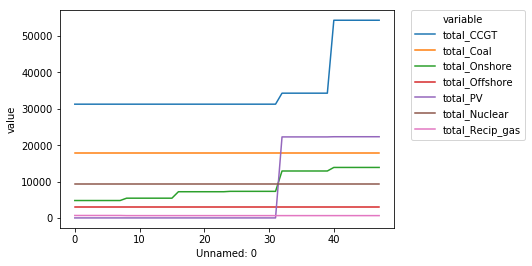

In [5]:
sns.lineplot(data=simulated_long[simulated_long['variable'].str.contains("total")], x='Unnamed: 0', y='value', hue='variable')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

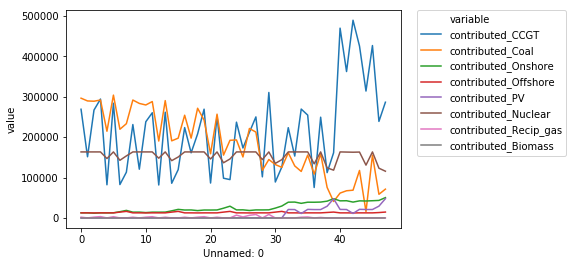

In [6]:
sns.lineplot(data=simulated_long[simulated_long['variable'].str.contains("contributed")], x='Unnamed: 0', y='value', hue='variable')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)



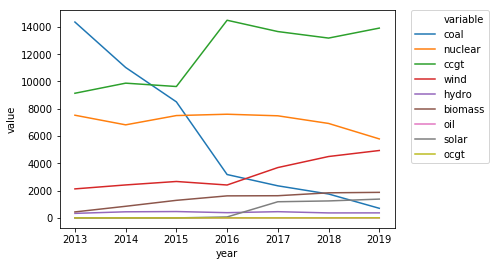

In [7]:
actual_yearly_mix = pd.read_csv('~/Documents/PhD/Projects/10. ELECSIM/elecsim/data/processed/electricity_mix/energy_mix_historical.csv')
sns.lineplot(data=actual_yearly_mix[actual_yearly_mix.year>=2013], x='year', y='value', hue='variable')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [8]:
best_mix = pd.concat([pd.read_csv(f) for f in glob.glob('/Users/b1017579/Documents/PhD/Projects/10. ELECSIM/run/validation-optimisation/best_run_all_dat/*.csv')],
                      ignore_index=True)
best_mix['run_id'] = np.repeat(list(range(int(len(best_mix)/48))), 48)
best_mix


,Unnamed: 0,contributed_CCGT,contributed_Coal,contributed_Onshore,contributed_Offshore,contributed_PV,contributed_Nuclear,contributed_Recip_gas,contributed_Biomass,total_CCGT,...,total_Onshore,total_Offshore,total_PV,total_Nuclear,total_Recip_gas,Carbon_tax,total_genco_wealth,Electricity_cost,Carbon_emitted,run_id
0,0,266003.28,294156.50,12574.927904,12490.430520,0.000000,163428.881549,1955.52,0,31272.0,...,4783.0,2949.0,0.0,9238.0,672.0,23.62,1.040223e+10,64.363717,1223.083471,0
1,1,148954.32,296479.10,12663.542545,12497.154240,0.000000,163428.881549,0.00,0,31272.0,...,4783.0,2949.0,0.0,9238.0,672.0,23.62,7.327078e+09,54.243620,969.871313,0
2,2,267669.36,290201.76,11658.160728,12340.267440,0.000000,163428.881549,1955.52,0,31272.0,...,4783.0,2949.0,0.0,9238.0,672.0,23.62,9.605550e+09,61.749486,1231.667989,0
3,3,296054.64,296054.08,12562.865178,12522.928500,0.000000,163428.881549,3259.20,0,31272.0,...,4783.0,2949.0,0.0,9238.0,672.0,23.62,1.508611e+10,63.468127,1301.097346,0
4,4,121624.56,171715.19,12519.602402,12497.154240,0.000000,150520.394080,0.00,0,31272.0,...,4783.0,2949.0,0.0,9238.0,672.0,23.62,3.734668e+09,50.253088,630.062788,0
5,5,278110.80,309958.08,12663.542545,12497.154240,0.000000,163428.881549,3041.92,0,31272.0,...,4783.0,2949.0,0.0,9238.0,672.0,23.62,9.691979e+09,63.923703,1304.586485,0
6,6,72714.96,227057.06,15401.362598,14368.869795,0.000000,142697.314049,0.00,0,31272.0,...,4783.0,2949.0,0.0,9238.0,672.0,23.62,-8.144515e+09,44.094913,654.266038,0
7,7,112979.52,232963.10,18636.226753,16175.309235,0.000000,153559.549735,0.00,0,31272.0,...,4783.0,2949.0,0.0,9238.0,672.0,23.62,-2.631718e+10,47.360797,749.181821,0
8,8,201065.04,283245.52,52647.487200,12490.430520,0.000000,163428.881549,1226.08,0,31272.0,...,19745.0,2949.0,0.0,9238.0,632.0,23.62,-3.531913e+10,54.393932,1082.040964,0
9,9,120926.88,250808.21,53018.490375,12497.154240,0.000000,163428.881549,0.00,0,31272.0,...,19745.0,2949.0,0.0,9238.0,632.0,23.62,-4.336535e+10,51.305275,811.514389,0


In [9]:
def get_year(df):
    df['year'] = np.repeat(list(range(6)), 8)
    return df

best_mix_year = best_mix.groupby('run_id').apply(get_year)  
best_mix_year

,Unnamed: 0,contributed_CCGT,contributed_Coal,contributed_Onshore,contributed_Offshore,contributed_PV,contributed_Nuclear,contributed_Recip_gas,contributed_Biomass,total_CCGT,...,total_Offshore,total_PV,total_Nuclear,total_Recip_gas,Carbon_tax,total_genco_wealth,Electricity_cost,Carbon_emitted,run_id,year
0,0,266003.28,294156.50,12574.927904,12490.430520,0.000000,163428.881549,1955.52,0,31272.0,...,2949.0,0.0,9238.0,672.0,23.62,1.040223e+10,64.363717,1223.083471,0,0
1,1,148954.32,296479.10,12663.542545,12497.154240,0.000000,163428.881549,0.00,0,31272.0,...,2949.0,0.0,9238.0,672.0,23.62,7.327078e+09,54.243620,969.871313,0,0
2,2,267669.36,290201.76,11658.160728,12340.267440,0.000000,163428.881549,1955.52,0,31272.0,...,2949.0,0.0,9238.0,672.0,23.62,9.605550e+09,61.749486,1231.667989,0,0
3,3,296054.64,296054.08,12562.865178,12522.928500,0.000000,163428.881549,3259.20,0,31272.0,...,2949.0,0.0,9238.0,672.0,23.62,1.508611e+10,63.468127,1301.097346,0,0
4,4,121624.56,171715.19,12519.602402,12497.154240,0.000000,150520.394080,0.00,0,31272.0,...,2949.0,0.0,9238.0,672.0,23.62,3.734668e+09,50.253088,630.062788,0,0
5,5,278110.80,309958.08,12663.542545,12497.154240,0.000000,163428.881549,3041.92,0,31272.0,...,2949.0,0.0,9238.0,672.0,23.62,9.691979e+09,63.923703,1304.586485,0,0
6,6,72714.96,227057.06,15401.362598,14368.869795,0.000000,142697.314049,0.00,0,31272.0,...,2949.0,0.0,9238.0,672.0,23.62,-8.144515e+09,44.094913,654.266038,0,0
7,7,112979.52,232963.10,18636.226753,16175.309235,0.000000,153559.549735,0.00,0,31272.0,...,2949.0,0.0,9238.0,672.0,23.62,-2.631718e+10,47.360797,749.181821,0,0
8,8,201065.04,283245.52,52647.487200,12490.430520,0.000000,163428.881549,1226.08,0,31272.0,...,2949.0,0.0,9238.0,632.0,23.62,-3.531913e+10,54.393932,1082.040964,0,1
9,9,120926.88,250808.21,53018.490375,12497.154240,0.000000,163428.881549,0.00,0,31272.0,...,2949.0,0.0,9238.0,632.0,23.62,-4.336535e+10,51.305275,811.514389,0,1


In [41]:
contributed_results = best_mix_year.filter(regex='contributed_')

contributed_results *= 1/24

contributed_results['year'] = best_mix_year['year']
contributed_results['run_id'] = best_mix_year['run_id']

contributed_results = contributed_results.rename(columns={'contributed_PV': "contributed_solar"})
# contributed_results
cluster_size = pd.Series([22.0, 30.0, 32.0, 35.0, 43.0, 53.0, 68.0, 82.0])

contributed_results['contributed_Wind'] = contributed_results['contributed_Offshore'] +  contributed_results['contributed_Onshore']
contributed_results = contributed_results.drop(['contributed_Offshore', 'contributed_Onshore'], axis=1)
contributed_results

# best_mix_year.to_csv('~/Documents/PhD/Projects/10. ELECSIM/run/beis_case_study/data/reference_run/elecsim_projections_total')

/Users/b1017579/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/b1017579/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [11]:

def get_weighted_average(df):
    return df.apply(lambda x: np.average(x, weights=cluster_size.values))

results_wa = contributed_results.groupby(['run_id','year']).apply(lambda x: get_weighted_average(x)).reset_index(drop=True)
results_wa

,contributed_CCGT,contributed_Coal,contributed_solar,contributed_Nuclear,contributed_Recip_gas,contributed_Biomass,year,run_id,contributed_Wind
0,7240.490877,10658.510366,0.000000,6492.859019,43.480804,0.0,0.0,0.0,1168.992065
1,5386.474932,9909.104104,0.000000,6089.902897,30.187817,0.0,1.0,0.0,3068.932216
2,5537.003671,8258.149953,0.000000,6002.518972,32.037461,0.0,2.0,0.0,3382.024368
3,7191.092137,4948.277838,0.000000,5981.864903,125.987941,0.0,3.0,0.0,3390.999015
4,6276.339644,3921.051718,190.403370,5747.349916,20.002374,0.0,4.0,0.0,4928.276628
5,5263.012603,4279.948695,193.743780,5678.483246,0.000000,0.0,5.0,0.0,5139.286162
6,7304.019288,10687.024136,0.000000,6481.508512,38.892128,0.0,0.0,1.0,1168.992065
7,6416.809726,10185.307121,0.000000,6429.920126,34.103694,0.0,1.0,1.0,1270.518993
8,6260.351589,8468.795818,0.000000,6225.997486,31.553126,0.0,2.0,1.0,2107.670020
9,7635.496603,5297.252627,0.000000,6174.546595,141.873352,0.0,3.0,1.0,2202.623729


In [12]:
hist_long = pd.melt(results_wa, id_vars=["run_id", "year"])
hist_long.head()

,run_id,year,variable,value
0,0.0,0.0,contributed_CCGT,7240.490877
1,0.0,1.0,contributed_CCGT,5386.474932
2,0.0,2.0,contributed_CCGT,5537.003671
3,0.0,3.0,contributed_CCGT,7191.092137
4,0.0,4.0,contributed_CCGT,6276.339644


In [13]:
hist_long['variable'] = hist_long.variable.str.split("_").str[-1].str.lower()
hist_long['year'] = hist_long['year'] + 2013
hist_long

,run_id,year,variable,value
0,0.0,2013.0,ccgt,7240.490877
1,0.0,2014.0,ccgt,5386.474932
2,0.0,2015.0,ccgt,5537.003671
3,0.0,2016.0,ccgt,7191.092137
4,0.0,2017.0,ccgt,6276.339644
5,0.0,2018.0,ccgt,5263.012603
6,1.0,2013.0,ccgt,7304.019288
7,1.0,2014.0,ccgt,6416.809726
8,1.0,2015.0,ccgt,6260.351589
9,1.0,2016.0,ccgt,7635.496603


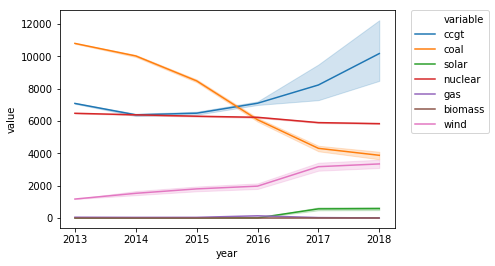

In [14]:
sns.lineplot(data=hist_long, x="year", y='value', hue='variable')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
hist_long['type'] = 'Predicted'

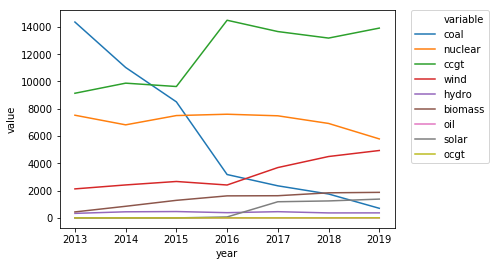

In [15]:
sns.lineplot(data=actual_yearly_mix[actual_yearly_mix.year>=2013], x='year', y='value', hue='variable')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [16]:
actual = actual_yearly_mix[(actual_yearly_mix.year>=2013) & (actual_yearly_mix.year<2019)]
actual['type'] = 'Actual'
actual = actual.drop('Unnamed: 0', axis=1)
actual = actual[actual['variable'].isin(['coal','ccgt','wind','solar','nuclear'])]
actual['run_id'] = -1
actual

/Users/b1017579/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,year,variable,value,type,run_id
2,2013,coal,14355.798134,Actual,-1
3,2014,coal,11025.881341,Actual,-1
4,2015,coal,8506.284996,Actual,-1
5,2016,coal,3179.857257,Actual,-1
6,2017,coal,2352.489874,Actual,-1
7,2018,coal,1753.406904,Actual,-1
11,2013,nuclear,7526.513864,Actual,-1
12,2014,nuclear,6821.166719,Actual,-1
13,2015,nuclear,7501.486303,Actual,-1
14,2016,nuclear,7599.286954,Actual,-1


In [17]:
both = pd.concat([actual, hist_long])
both.head()

NameError: name 'actual' is not defined

In [18]:
def get_mix(df):
    df['value_perc'] = df['value']/sum(df['value'])*100
    return df.reset_index()

both_mix = both.groupby(['year','type','run_id']).apply(lambda x: get_mix(x))
both_mix = both_mix.rename(columns={"type":"Type", "variable":'Technology'})
both_mix['Technology'] = both_mix['Technology'].map({'coal': "Coal", 'ccgt': "CCGT", 'nuclear':"Nuclear", "wind":"Wind","solar":"Solar"})
both_mix

index  run_id       Type         value Technology  \
year   type      run_id                                                        
2013.0 Actual    -1.0   0      2    -1.0     Actual  14355.798134       Coal   
                        1     11    -1.0     Actual   7526.513864    Nuclear   
                        2     20    -1.0     Actual   9135.930888       CCGT   
                        3     29    -1.0     Actual   2127.126709       Wind   
                        4     65    -1.0     Actual      0.000000      Solar   
       Predicted  0.0   0      0     0.0  Predicted   7240.490877       CCGT   
                        1    576     0.0  Predicted  10658.510366       Coal   
                        2   1152     0.0  Predicted      0.000000      Solar   
                        3   1728     0.0  Predicted   6492.859019    Nuclear   
                        4   2304     0.0  Predicted     43.480804        NaN   
                        5   2880     0.0  Predicted      0.000000        NaN   
                        6   3456     0.0  Predicted   1168.992065       Wind   
                  1.0   0      6     1.0  Predicted   7304.019288       CCGT   
                        1    582     1.0  Predicted  10687.024136       Coal   
                        2   1158     1.0  Predicted      0.000000      Solar   
                        3   1734     1.0  Predicted   6481.508512    Nuclear   
                        4   2310     1.0  Predicted     38.892128        NaN   
                        5   2886     1.0  Predicted      0.000000        NaN   
                        6   3462     1.0  Predicted   1168.992065       Wind   
                  2.0   0     12     2.0  Predicted   6947.909096       CCGT   
                        1    588     2.0  Predicted  10906.864091       Coal   
                        2   1164     2.0  Predicted      0.000000      Solar   
                        3   1740     2.0  Predicted   6471.238108    Nuclear   
                        4   2316     2.0  Predicted     47.566763        NaN   
                        5   2892     2.0  Predicted      0.000000        NaN   
...                          ...     ...        ...           ...        ...   
2018.0 Predicted  92.0  3   2285    92.0  Predicted   5833.926373    Nuclear   
                        4   2861    92.0  Predicted      0.000000        NaN   
                        5   3437    92.0  Predicted      0.000000        NaN   
                        6   4013    92.0  Predicted   3445.617020       Wind   
                  93.0  0    563    93.0  Predicted   9729.035055       CCGT   
                        1   1139    93.0  Predicted   4390.033733       Coal   
                        2   1715    93.0  Predicted    976.232514      Solar   
                        3   2291    93.0  Predicted   5916.232652    Nuclear   
                        4   2867    93.0  Predicted      0.000000        NaN   
                        5   3443    93.0  Predicted      0.000000        NaN   
                        6   4019    93.0  Predicted   2197.920499       Wind   
                  94.0  0    569    94.0  Predicted   7129.636877       CCGT   
                        1   1145    94.0  Predicted   3188.664284       Coal   
                        2   1721    94.0  Predicted    508.577423      Solar   
                        3   2297    94.0  Predicted   5755.830190    Nuclear   
                        4   2873    94.0  Predicted      0.000000        NaN   
                        5   3449    94.0  Predicted      0.000000        NaN   
                        6   4025    94.0  Predicted   4162.744292       Wind   
                  95.0  0    575    95.0  Predicted   8110.306889       CCGT   
                        1   1151    95.0  Predicted   2973.231194       Coal   
                        2   1727    95.0  Predicted    183.722550      Solar   
                        3   2303    95.0  Predicted   5833.587263    Nuclear   
                        4  

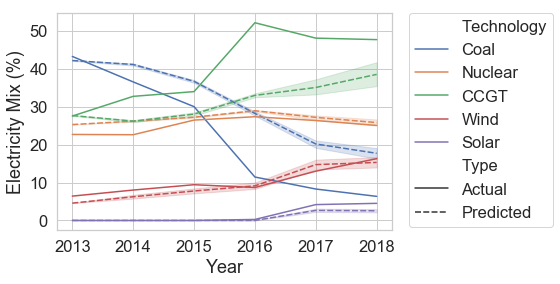

In [37]:
sns.set(font_scale=1.5)
sns.set_style("whitegrid")
g=sns.lineplot(data=both_mix, x='year', y='value_perc', style='Type', hue='Technology')
g.set(xlabel='Year', ylabel='Electricity Mix (%)')
lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('/Users/b1017579/Documents/PhD/Projects/10. ELECSIM/notebooks/validation-optimisation/figures/results/throughout_years.pdf',dpi=500, bbox_extra_artists=(lgd,), bbox_inches='tight')





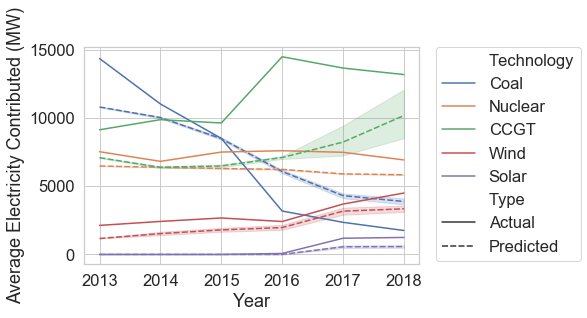

In [38]:
sns.lineplot(data=both_mix, x='year', y='value', hue='Technology', style='Type')
plt.ylabel("Average Electricity Contributed (MW)")
plt.xlabel("Year")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

both_mix.to_csv('~/Documents/PhD/Projects/10. ELECSIM/run/beis_case_study/data/reference_run/elecsim_projections.csv')

In [21]:
both_mix.reset_index(drop=True).groupby(['Type','Technology','year'])['value_perc'].mean().to_csv('/Users/b1017579/Documents/PhD/Projects/10. ELECSIM/notebooks/validation-optimisation/data/results/predictions_actuals.csv')

    

/Users/b1017579/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [22]:
## One time step

In [23]:
single_time_step_mix = pd.concat([pd.read_csv(f) for f in glob.glob('/Users/b1017579/Documents/PhD/Projects/10. ELECSIM/run/validation-optimisation/best_run_all_dat_yearly_time_step/*.csv')],
                      ignore_index=True)

single_time_step_mix['run_id'] = np.repeat(list(range(int(len(single_time_step_mix)/6))), 6)
single_time_step_mix



,Unnamed: 0,contributed_CCGT,contributed_Coal,contributed_Onshore,contributed_Offshore,contributed_PV,contributed_Nuclear,contributed_Recip_gas,contributed_Biomass,total_CCGT,...,total_Onshore,total_Offshore,total_PV,total_Nuclear,total_Recip_gas,Carbon_tax,total_genco_wealth,Electricity_cost,Carbon_emitted,run_id
0,0,140472.00,267713.62,2.683152e+04,21420.447858,0.000000,136190.734624,651.84,0,31272.0,...,4783.0,2949.0,0.0,9238.0,672.0,23.62,2.425255e+11,59.332152,891.533355,0
1,1,174321.36,200076.19,3.480861e+04,21420.447858,0.000000,136190.734624,613.04,0,31272.0,...,6205.0,2949.0,0.0,9238.0,632.0,23.62,3.987386e+11,57.287829,817.166099,0
2,2,158392.08,200187.58,3.466837e+04,21420.447858,0.000000,136190.734624,1156.24,0,31272.0,...,6180.0,2949.0,0.0,9238.0,632.0,23.62,5.744133e+11,53.019837,788.874641,0
3,3,166962.24,168810.36,4.378424e+04,21420.447858,0.000000,136190.734624,3005.06,0,31272.0,...,7805.0,2949.0,0.0,9238.0,632.0,23.62,7.133386e+11,48.542558,756.621188,0
4,4,0.00,0.00,4.271718e+07,10372.465087,1701.759497,0.000000,0.00,0,175056.0,...,1637720.0,2949.0,112.0,9238.0,632.0,23.62,3.387670e+11,3.878918,0.000000,0
5,5,0.00,0.00,4.149238e+07,10372.465087,1701.759497,0.000000,0.00,0,2786930.0,...,1654358.0,2949.0,112.0,9238.0,632.0,23.62,1.788375e+12,3.878918,0.000000,0
6,0,142509.60,266508.08,2.683152e+04,21420.447858,0.000000,136190.734624,651.84,0,31272.0,...,4783.0,2949.0,0.0,9238.0,672.0,23.62,2.389798e+11,58.505598,892.636167,1
7,1,130665.60,251600.78,2.661835e+04,21420.447858,0.000000,136190.734624,613.04,0,30872.0,...,4745.0,2949.0,0.0,9238.0,632.0,23.62,4.320354e+11,52.902045,841.546536,1
8,2,77097.60,155844.09,1.769179e+05,21420.447858,0.000000,132790.388993,0.00,0,30872.0,...,31560.0,2949.0,0.0,9238.0,632.0,23.62,5.327664e+11,45.063506,508.144713,1
9,3,127249.92,79064.78,1.768247e+05,21420.447858,0.000000,131891.099665,1778.98,0,30872.0,...,31545.0,2949.0,0.0,9238.0,632.0,23.62,6.301024e+11,45.264991,464.324829,1


In [24]:
def get_year(df):
    df['year'] = np.repeat(list(range(6)), 1)
    return df

single_time_step_mix_year = single_time_step_mix.groupby('run_id').apply(get_year)  
single_time_step_mix_year

,Unnamed: 0,contributed_CCGT,contributed_Coal,contributed_Onshore,contributed_Offshore,contributed_PV,contributed_Nuclear,contributed_Recip_gas,contributed_Biomass,total_CCGT,...,total_Offshore,total_PV,total_Nuclear,total_Recip_gas,Carbon_tax,total_genco_wealth,Electricity_cost,Carbon_emitted,run_id,year
0,0,140472.00,267713.62,2.683152e+04,21420.447858,0.000000,136190.734624,651.84,0,31272.0,...,2949.0,0.0,9238.0,672.0,23.62,2.425255e+11,59.332152,891.533355,0,0
1,1,174321.36,200076.19,3.480861e+04,21420.447858,0.000000,136190.734624,613.04,0,31272.0,...,2949.0,0.0,9238.0,632.0,23.62,3.987386e+11,57.287829,817.166099,0,1
2,2,158392.08,200187.58,3.466837e+04,21420.447858,0.000000,136190.734624,1156.24,0,31272.0,...,2949.0,0.0,9238.0,632.0,23.62,5.744133e+11,53.019837,788.874641,0,2
3,3,166962.24,168810.36,4.378424e+04,21420.447858,0.000000,136190.734624,3005.06,0,31272.0,...,2949.0,0.0,9238.0,632.0,23.62,7.133386e+11,48.542558,756.621188,0,3
4,4,0.00,0.00,4.271718e+07,10372.465087,1701.759497,0.000000,0.00,0,175056.0,...,2949.0,112.0,9238.0,632.0,23.62,3.387670e+11,3.878918,0.000000,0,4
5,5,0.00,0.00,4.149238e+07,10372.465087,1701.759497,0.000000,0.00,0,2786930.0,...,2949.0,112.0,9238.0,632.0,23.62,1.788375e+12,3.878918,0.000000,0,5
6,0,142509.60,266508.08,2.683152e+04,21420.447858,0.000000,136190.734624,651.84,0,31272.0,...,2949.0,0.0,9238.0,672.0,23.62,2.389798e+11,58.505598,892.636167,1,0
7,1,130665.60,251600.78,2.661835e+04,21420.447858,0.000000,136190.734624,613.04,0,30872.0,...,2949.0,0.0,9238.0,632.0,23.62,4.320354e+11,52.902045,841.546536,1,1
8,2,77097.60,155844.09,1.769179e+05,21420.447858,0.000000,132790.388993,0.00,0,30872.0,...,2949.0,0.0,9238.0,632.0,23.62,5.327664e+11,45.063506,508.144713,1,2
9,3,127249.92,79064.78,1.768247e+05,21420.447858,0.000000,131891.099665,1778.98,0,30872.0,...,2949.0,0.0,9238.0,632.0,23.62,6.301024e+11,45.264991,464.324829,1,3


In [25]:


contributed_results_single = single_time_step_mix_year.filter(regex='contributed_')
contributed_results_single *= 1/20

contributed_results_single['year'] = single_time_step_mix_year['year']
contributed_results_single['run_id'] = single_time_step_mix_year['run_id']

contributed_results_single = contributed_results_single.rename(columns={'contributed_PV': "contributed_solar"})
# contributed_results
# cluster_size = pd.Series([22.0, 30.0, 32.0, 35.0, 43.0, 53.0, 68.0, 82.0])

contributed_results_single['contributed_Wind'] = contributed_results_single['contributed_Offshore'] +  contributed_results_single['contributed_Onshore']
contributed_results_single = contributed_results_single.drop(['contributed_Offshore', 'contributed_Onshore'], axis=1)
contributed_results_single



/Users/b1017579/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/b1017579/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,contributed_CCGT,contributed_Coal,contributed_solar,contributed_Nuclear,contributed_Recip_gas,contributed_Biomass,year,run_id,contributed_Wind
0,7023.600,13385.6810,0.000000,6809.536731,32.592,0.0,0,0,2.412599e+03
1,8716.068,10003.8095,0.000000,6809.536731,30.652,0.0,1,0,2.811453e+03
2,7919.604,10009.3790,0.000000,6809.536731,57.812,0.0,2,0,2.804441e+03
3,8348.112,8440.5180,0.000000,6809.536731,150.253,0.0,3,0,3.260235e+03
4,0.000,0.0000,85.087975,0.000000,0.000,0.0,4,0,2.136378e+06
5,0.000,0.0000,85.087975,0.000000,0.000,0.0,5,0,2.075138e+06
6,7125.480,13325.4040,0.000000,6809.536731,32.592,0.0,0,1,2.412599e+03
7,6533.280,12580.0390,0.000000,6809.536731,30.652,0.0,1,1,2.401940e+03
8,3854.880,7792.2045,0.000000,6639.519450,0.000,0.0,2,1,9.916919e+03
9,6362.496,3953.2390,0.000000,6594.554983,88.949,0.0,3,1,9.912258e+03


In [26]:
# contributed_results_single['contributed_total'] = contributed_results_single['contributed_CCGT'] + contributed_results_single['contributed_Coal'] + contributed_results_single['contributed_solar'] + contributed_results_single['contributed_Nuclear'] + contributed_results_single['contributed_Recip_gas'] + contributed_results_single['contributed_Biomass'] + contributed_results_single['contributed_Wind']
# contributed_results_single

In [27]:
hist_long_single = pd.melt(contributed_results_single, id_vars=["run_id", "year"])
hist_long_single.head()

,run_id,year,variable,value
0,0,0,contributed_CCGT,7023.600
1,0,1,contributed_CCGT,8716.068
2,0,2,contributed_CCGT,7919.604
3,0,3,contributed_CCGT,8348.112
4,0,4,contributed_CCGT,0.000


In [28]:
hist_long_single['variable'] = hist_long_single.variable.str.split("_").str[-1].str.lower()
hist_long_single['year'] = hist_long_single['year'] + 2013
hist_long_single

,run_id,year,variable,value
0,0,2013,ccgt,7.023600e+03
1,0,2014,ccgt,8.716068e+03
2,0,2015,ccgt,7.919604e+03
3,0,2016,ccgt,8.348112e+03
4,0,2017,ccgt,0.000000e+00
5,0,2018,ccgt,0.000000e+00
6,1,2013,ccgt,7.125480e+03
7,1,2014,ccgt,6.533280e+03
8,1,2015,ccgt,3.854880e+03
9,1,2016,ccgt,6.362496e+03


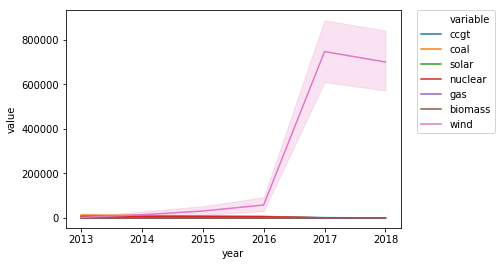

In [29]:
sns.lineplot(data=hist_long_single, x="year", y='value', hue='variable')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
hist_long_single['type'] = 'Predicted'

In [30]:
hist_long_single


,run_id,year,variable,value,type
0,0,2013,ccgt,7.023600e+03,Predicted
1,0,2014,ccgt,8.716068e+03,Predicted
2,0,2015,ccgt,7.919604e+03,Predicted
3,0,2016,ccgt,8.348112e+03,Predicted
4,0,2017,ccgt,0.000000e+00,Predicted
5,0,2018,ccgt,0.000000e+00,Predicted
6,1,2013,ccgt,7.125480e+03,Predicted
7,1,2014,ccgt,6.533280e+03,Predicted
8,1,2015,ccgt,3.854880e+03,Predicted
9,1,2016,ccgt,6.362496e+03,Predicted


In [31]:
def get_mix(df_var):
    df_var['value_perc'] = df_var['value']/sum(df_var['value'])*100
    return df_var#.reset_index()

both_mix_single = hist_long_single.groupby(['run_id','year','type']).apply(get_mix)

both_mix_single = both_mix_single.rename(columns={"type":"Type", "variable":'Technology'})
both_mix_single['Technology'] = both_mix_single['Technology'].map({'coal': "Coal", 'ccgt': "CCGT", 'nuclear':"Nuclear", "wind":"Wind","solar":"Solar"})
both_mix_single

,run_id,year,Technology,value,Type,value_perc
0,0,2013,CCGT,7.023600e+03,Predicted,23.677178
1,0,2014,CCGT,8.716068e+03,Predicted,30.721189
2,0,2015,CCGT,7.919604e+03,Predicted,28.693414
3,0,2016,CCGT,8.348112e+03,Predicted,30.909026
4,0,2017,CCGT,0.000000e+00,Predicted,0.000000
5,0,2018,CCGT,0.000000e+00,Predicted,0.000000
6,1,2013,CCGT,7.125480e+03,Predicted,23.986983
7,1,2014,CCGT,6.533280e+03,Predicted,23.040652
8,1,2015,CCGT,3.854880e+03,Predicted,13.668080
9,1,2016,CCGT,6.362496e+03,Predicted,23.642297


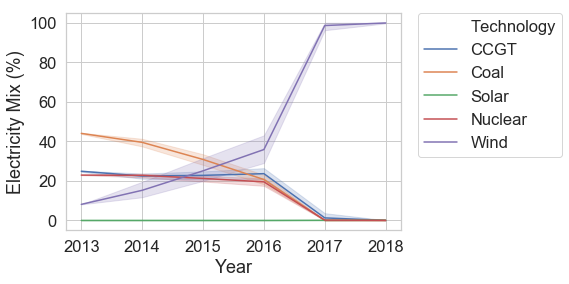

In [36]:

sns.set(font_scale=1.5)
sns.set_style("whitegrid")
g=sns.lineplot(data=both_mix_single, x='year', y='value_perc', hue='Technology')
g.set(xlabel='Year', ylabel='Electricity Mix (%)')
lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('/Users/b1017579/Documents/PhD/Projects/14-temporal-granularity/temporal_granularity/reports/figures/yearly_time_step_scenario.pdf', dpi=500, bbox_extra_artists=(lgd,), bbox_inches='tight')


## Taking out known retired power stations

In [6]:
def data_to_plot(location):
    best_mix = pd.concat([pd.read_csv(f) for f in glob.glob('/Users/b1017579/Documents/PhD/Projects/10-ELECSIM/run/validation-optimisation/{}/*.csv'.format(location))],
                      ignore_index=True)
    best_mix['run_id'] = np.repeat(list(range(int(len(best_mix)/48))), 48)
    best_mix
    def get_year(df):
        df['year'] = np.repeat(list(range(6)), 8)
        return df

    best_mix_year = best_mix.groupby('run_id').apply(get_year)  
    best_mix_year
    contributed_results = best_mix_year.filter(regex='contributed_')

    contributed_results *= 1/24

    contributed_results['year'] = best_mix_year['year']
    contributed_results['run_id'] = best_mix_year['run_id']

    contributed_results = contributed_results.rename(columns={'contributed_PV': "contributed_solar"})
    # contributed_results
    cluster_size = pd.Series([22.0, 30.0, 32.0, 35.0, 43.0, 53.0, 68.0, 82.0])

    contributed_results['contributed_Wind'] = contributed_results['contributed_Offshore'] +  contributed_results['contributed_Onshore']
    contributed_results = contributed_results.drop(['contributed_Offshore', 'contributed_Onshore'], axis=1)
    print(contributed_results.columns)
    contributed_results['contributed_Gas'] = contributed_results['contributed_Recip_gas'] + contributed_results['contributed_CCGT']
    contributed_results = contributed_results.drop(['contributed_Recip_gas', 'contributed_CCGT'], axis=1)

    contributed_results
    def get_weighted_average(df):
        return df.apply(lambda x: np.average(x, weights=cluster_size.values))

    results_wa = contributed_results.groupby(['run_id','year']).apply(lambda x: get_weighted_average(x)).reset_index(drop=True)
    results_wa
    hist_long = pd.melt(results_wa, id_vars=["run_id", "year"])
    hist_long.head()
    hist_long['variable'] = hist_long.variable.str.split("_").str[-1].str.lower()
    hist_long['year'] = hist_long['year'] + 2013
    hist_long
#     sns.lineplot(data=hist_long, x="year", y='value', hue='variable')
#     plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    hist_long['type'] = 'Predicted'
    
    actual_yearly_mix = pd.read_csv('~/Documents/PhD/Projects/10-ELECSIM/elecsim/data/processed/electricity_mix/energy_mix_historical.csv')
    actual = actual_yearly_mix[(actual_yearly_mix.year>=2013) & (actual_yearly_mix.year<2019)]
    actual['type'] = 'Actual'
    actual = actual.drop('Unnamed: 0', axis=1)
    actual = actual[actual['variable'].isin(['coal','ccgt','wind','solar','nuclear'])]
    actual['run_id'] = -1
    actual

    def get_mix(df):
        df['value_perc'] = df['value']/sum(df['value'])*100
        return df.reset_index()

    actual = actual_yearly_mix[(actual_yearly_mix.year>=2013) & (actual_yearly_mix.year<2019)]
    actual['type'] = 'Actual'
    actual = actual.drop('Unnamed: 0', axis=1)
    actual = actual[actual['variable'].isin(['coal','ccgt','wind','solar','nuclear'])]
    actual['run_id'] = -1
    actual
    
#     print(actual)
    
    both = pd.concat([actual, hist_long])
    
    both_mix = both.groupby(['year','type','run_id']).apply(lambda x: get_mix(x))
    both_mix = both_mix.rename(columns={"type":"Type", "variable":'Technology'})
    both_mix['Technology'] = both_mix['Technology'].map({'coal': "Coal", 'gas': "Gas", 'nuclear':"Nuclear", "wind":"Wind","solar":"Solar", "ccgt":"Gas"})
    both_mix
    both_mix.to_csv('~/Documents/PhD/Projects/10-ELECSIM/run/beis_case_study/data/reference_run/elecsim_projections_coal_dropout.csv')
#     print("both_mix: {}".format(both_mix))
    both_mix.reset_index(drop=True).groupby(['Type','Technology','year'])['value_perc'].mean().to_csv('/Users/b1017579/Documents/PhD/Projects/10-ELECSIM/notebooks/validation-optimisation/data/results/predictions_actuals_coal_dropout.csv')

    sns.set(font_scale=1.5)
    sns.set_style("whitegrid")
    g=sns.lineplot(data=both_mix, x='year', y='value_perc', style='Type', hue='Technology')
    g.set(xlabel='Year', ylabel='Electricity Mix (%)')
    lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    print(g)
    

/Users/b1017579/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/Users/b1017579/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Index(['contributed_CCGT', 'contributed_Coal', 'contributed_solar',
       'contributed_Nuclear', 'contributed_Recip_gas', 'contributed_Biomass',
       'year', 'run_id', 'contributed_Wind'],
      dtype='object')


/Users/b1017579/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/b1017579/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/b1017579/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:65: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the fu

AxesSubplot(0.125,0.125;0.775x0.755)


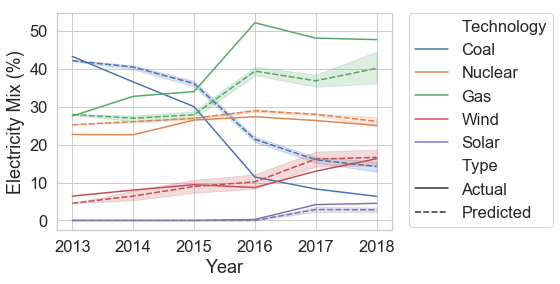

In [7]:
data_to_plot("best_run_all_dat_yearly_time_step_retired_plants")

In [ ]:


# both_mix.reset_index(drop=True).groupby(['Type','Technology','year'])['value_perc'].mean().to_csv('/Users/b1017579/Documents/PhD/Projects/10. ELECSIM/notebooks/validation-optimisation/data/results/predictions_actuals.csv')
